# Constraint Optimization

The notebook exercises numerical optimization of problems with equality constraints using Lagrangian multipliers and gradient descent. It implements [this](https://en.wikipedia.org/wiki/Lagrange_multiplier#Example_4:_Numerical_optimization) idea.

Function and constraint:

$$
\begin{align}
f(x)&=x^2\\
x^*&=\text{argmin}( f(x))\\
\text{subject to }& x^2=1
\end{align}
$$

The obviouse solutions are $x^*_0=1$ and $x^*_1=-1$.

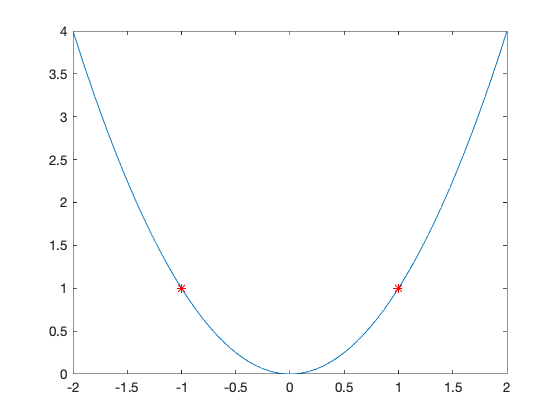

In [2]:
X = linspace(-2,2);
Y = X.^2;
plot(X,Y)
hold on
plot(-1,1, 'r*')
plot(1,1, 'r*')

Lagrange multipliers:

$$\mathcal L(x,\lambda) = x^2 + \lambda(x^2-1)$$

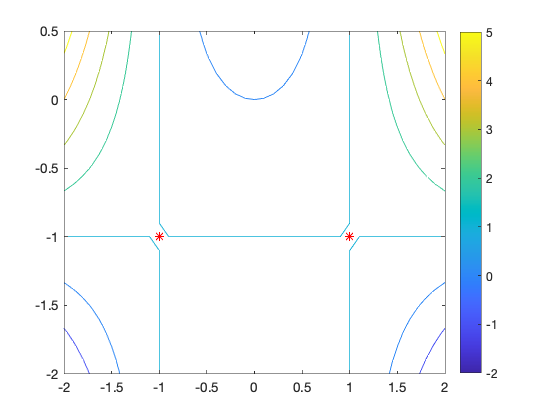

In [3]:
L = @(x, l)(x^2 + l*(x^2-1));
[xs,ls] = meshgrid(-2:0.1:2,-2:0.1:0.5);
plot3d(L, xs, ls, false) %3D contour
hold on
plot3(-1,-1, L(-1,-1),'r*')%since we know the optimum scale factor lambda = -1 
plot3(1,-1,  L(1,-1),'r*') %which is the same for both solutions

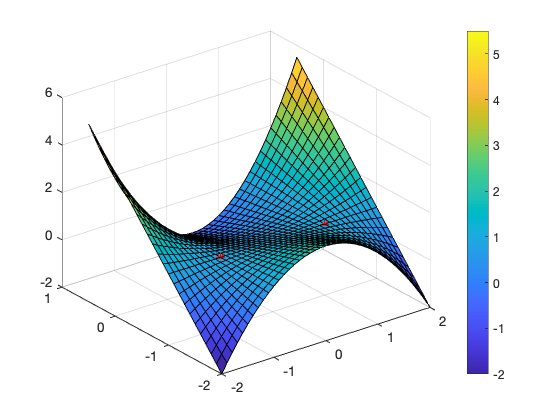

In [4]:
plot3d(L, xs, ls, true) %3D surface  
hold on
plot3(-1,-1, L(-1,-1),'r*')%since we know the optimum scale factor lambda = -1 
plot3(1,-1,  L(1,-1),'r*') %which is the same for both solutions

Partials:

$$
\begin{align}
\frac{\partial \mathcal L}{\partial x}&=2x+2x\lambda\\
\frac{\partial \mathcal L}{\partial \lambda}&=x^2-1
\end{align}
$$

In [5]:
%%file grad_L.m
function grad = grad_L(x, l)
    grad_x = 2*x+2*x*l;
    grad_l = x^2-1;
    grad = [grad_x; grad_l];
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_L.m'.


In [6]:
grad_L(0.5,0.5)


ans =

    1.5000
   -0.7500




In [7]:
%%file grad_desc_h.m
function [xs, ls] = grad_desc_h(K, x0, l0, learning_eps, f, ff, verbose)
    xs = zeros(K+1,1);
    ls = zeros(K+1,1);
    xs(1)=x0;
    ls(1)=l0;
    for k = 1:K
        grad = ff(xs(k),ls(k));
        grad_x = grad(1);
        grad_l = grad(2);
        %learning_eps * [grad_a, grad_b].'
        xs(k+1)= xs(k) - learning_eps * grad_x;
        ls(k+1)= ls(k) - learning_eps * grad_l;
        if verbose
            line([xs(k),xs(k+1)],[ls(k),ls(k+1)])
            hold on
        end
    end
    if verbose
        xlow = min([xs.', -2]);
        xhigh = max([xs.', +2]);
        llow = min([ls.', -2]);
        lhigh = max([ls.', 0.5]);
        [A,B] = meshgrid(xlow:0.1:xhigh,llow:0.1:lhigh);
        plot3d(f, A, B, false) %3D contour
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_desc_h.m'.



ans =

    0.0000
    9.9452




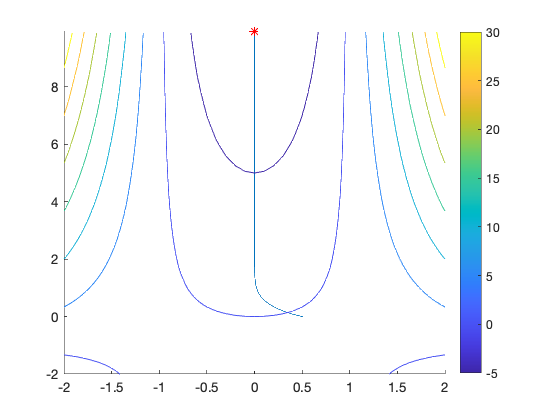

In [8]:
ff = @(x,l)(grad_L(x,l));
K = 10000;
learning_eps = 0.001;
[xs, ls] = grad_desc_h(K, 0.5, 0, learning_eps, L, ff, true);
[xs(K); ls(K)]
hold on 
plot(xs(K), ls(K), 'r*')

Gradient descent does not seam to converge to a solution.

The reason is that the critical points of Lagrangians occur at saddle points, rather than at local minima. Therefore, we must modify the problem formulation to ensure that it's a minimization problem. Below we do this by minimizing the square of the Lagrangian gradient's magnitude. 

(Squared) magnitude of the gradient of the Lagrangian:

$$h^2(x, \lambda) = (2x+2x\lambda)^2+(x^2-1)^2$$
$$h(x, \lambda) = \sqrt{(2x+2x\lambda)^2+(x^2-1)^2}$$

In [9]:
h2 = @(x, l)(((2*x+2*x*l)^2 + (x^2-1)^2));
h = @(x, l)(sqrt((2*x+2*x*l)^2 + (x^2-1)^2));
[xx,ll] = meshgrid(-3:0.1:2.5,-3:0.1:2);

In [10]:
%plot3d(h2, xx, ll, false) %3D contour

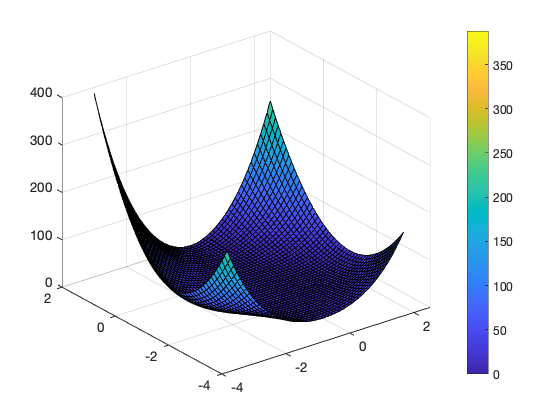

In [11]:
plot3d(h2, xx, ll, true) %3D surface

In [12]:
%plot3d(h, xx, ll, false) %3D surface

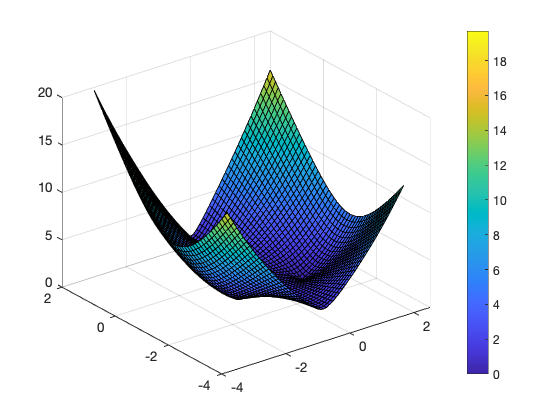

In [13]:
plot3d(h, xx, ll, true) %3D contour

Gradient of squared magnitude

$$
\begin{bmatrix}
\frac{\partial h^2}{\partial x}\\
\frac{\partial h^2}{\partial \lambda}
\end{bmatrix}=
\begin{bmatrix}
4x(x^2+2\lambda^2+4\lambda+1)\\
8x^2(\lambda+1)
\end{bmatrix}
$$

In [14]:
%%file grad_h2.m
function grad = grad_h2(x, l)
    grad_x = 4*x*(x^2+2*l^2+4*l+1);
    grad_l = 8*x^2*(l+1);
    grad = [grad_x; grad_l];
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_h2.m'.


In [15]:
grad_h2(0,0)


ans =

     0
     0




We should not start at the saddle points $(0,\lambda_0)$


ans =

    1.0000
   -1.0000




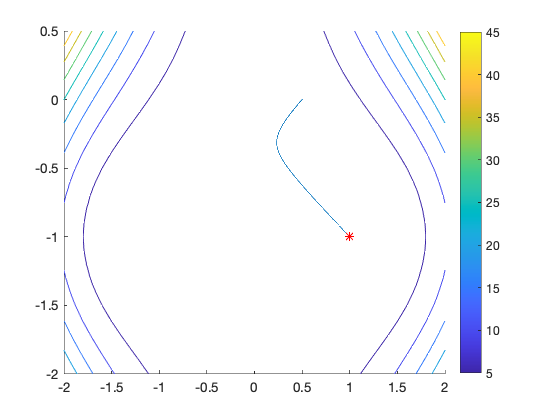

In [16]:
ff = @(x,l)(grad_h2(x,l));
K = 10000;
learning_eps = 0.001;
[xs, ls] = grad_desc_h(K, 0.5, 0, learning_eps, h2, ff, true);
[xs(K); ls(K)]
hold on 
plot(xs(K), ls(K), 'r*')


ans =

   -1.0000
   -1.0000




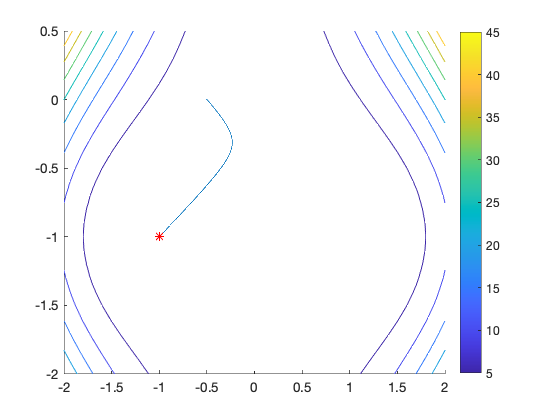

In [17]:
[xs, ls] = grad_desc_h(K, -0.5, 0, learning_eps, h2, ff, true);
[xs(K); ls(K)]
hold on 
plot(xs(K), ls(K), 'r*')

Gradient of magnitude

$$
\begin{bmatrix}
\frac{\partial h}{\partial x}\\
\frac{\partial h}{\partial \lambda}
\end{bmatrix}=\frac{1}{\sqrt{x^4+x^2(4\lambda^2 +8\lambda+2)+1}}
\begin{bmatrix}
2x(x^2+2\lambda^2+4\lambda+1)\\
4x^2(\lambda+1)
\end{bmatrix}
$$

In [18]:
%%file grad_h.m
function grad = grad_h(x, l)
    grad_x = 2*x*(x^2+2*l^2+4*l+1);
    grad_l = 4*x^2*(l+1);
    grad = [grad_x/sqrt(x^4+x^2*(4*l^2 +8*l+2)+1); grad_l/sqrt(x^4+x^2*(4*l^2 +8*l+2)+1)];
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_h.m'.


In [19]:
grad_h(0, 0)


ans =

     0
     0




Mind that $(0,\lambda_0)$ are saddle points in $h$ as well. We should not start at any of them.


ans =

    1.0009
   -0.9994




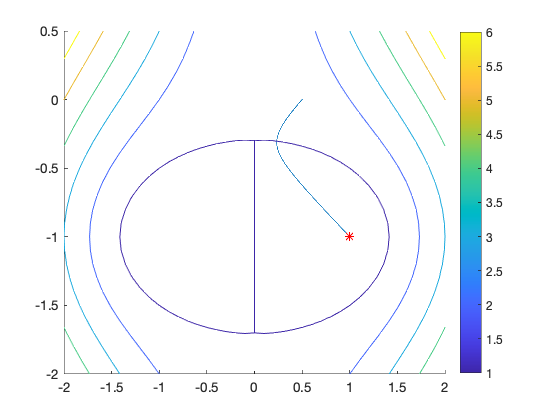

In [20]:
ff = @(x,l)(grad_h(x,l));
[xs, ls] = grad_desc_h(K, 0.5, 0, learning_eps, h, ff, true);
[xs(K); ls(K)]
hold on 
plot(xs(K), ls(K), 'r*')


ans =

   -1.0009
   -0.9994




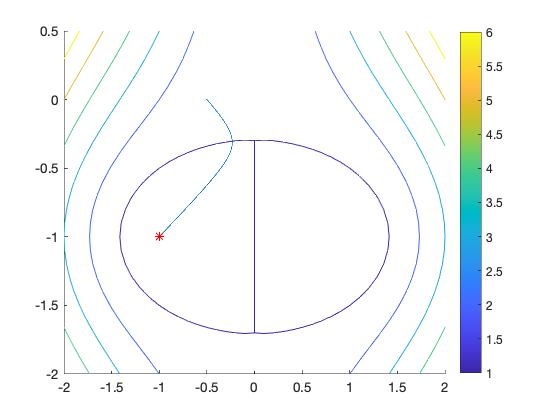

In [21]:
[xs, ls] = grad_desc_h(K, -0.5, 0, learning_eps, h, ff, true);
[xs(K); ls(K)]
hold on 
plot(xs(K), ls(K), 'r*')

In [23]:
grad_factor = @(x,l)(1/sqrt(x^4+x^2*(4*l^2 +8*l+2)+1));
grad_factor(1,-1)


ans =

   Inf




Although the minima are more pronounced in $h$ than in $h^2$, gradient descent converges better in $h^2$. This is due to problems of calculating the factor $$\frac{1}{\sqrt{x^4+x^2(4\lambda^2 +8\lambda+2)+1}}$$ of the gradient of $h$ near the solutions. This factor is actually not defined at the solution (division by zero).